# Basit Doğrusal Regresyon

Basit doğrusal regrosyon , değişken arasındaki ilişkiyi tanımlamak için kullanılan doğrusal bir modelin yaklaşımıdır.Formülünü aslında hepimiz biliyoruz :)

\begin{align} 
y=a+bx   (Doğrusal Fonksiyon Denklemi)
\end{align}


\begin{align} 
y = a + bx + e (Basit Doğrusal Regresyon Denklemi)
\end{align}

\begin{align} 
y = B_0 + B_1X + e (Basit Doğrusal Regresyon Denklemi)
\end{align}

##### Modüller Eklenir

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

##### İstenilen veri alınır ve ortama gösterilir

In [2]:
data=sns.load_dataset("anscombe")
df=data.copy()

In [3]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


##### Verinin özelliklerine bakılır

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
dataset    44 non-null object
x          44 non-null float64
y          44 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


#### İstenilmeyen sütun silinir

In [5]:
df.drop(["dataset"],axis=1,inplace=True)

In [6]:
df.head()

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33


##### Değişkenlerin yapıları istatistiksel olarak incelenir

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,44.0,9.000000,3.198837,4.0,7.0000,8.00,11.0000,19.00
y,44.0,7.500682,1.958925,3.1,6.1175,7.52,8.7475,12.74


#####  İki değişken arasındaki ilişkinin değeri incelenir

In [8]:
df.corr()

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


##### Veriler yardımıyla histogram ve regresyon dağılımı bir arada incelenir

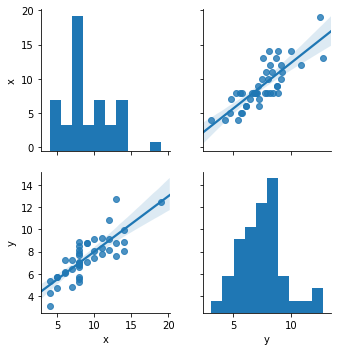

In [9]:
sns.pairplot(df,kind="reg")

##### Veriler yardımıyla dağılım,yoğunluk ve regresyon grafiği incelenir

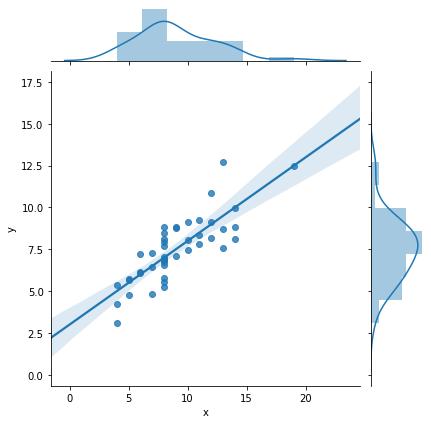

In [10]:
sns.jointplot("x","y",df,kind="reg")

##### Basit doğrusal yöntemlerden bir tanesi olan statsmodel modülü eklenir

In [11]:
import statsmodels.api as sm

#### Bağımsız değişken : x ve bağımlı değişken : y olarak seçilip ayrı veri kümesine atanır

In [12]:
X=df[["x"]]
Y=df[["y"]]

In [13]:
X.head()

,x
0,10.0
1,8.0
2,13.0
3,9.0
4,11.0


In [14]:
Y.head()

,y
0,8.04
1,6.95
2,7.58
3,8.81
4,8.33


##### Bağımsız değişkenin olduğu tabloya sabit eklenir

In [15]:
X=sm.add_constant(X)
X.head()

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,x
0,1.0,10.0
1,1.0,8.0
2,1.0,13.0
3,1.0,9.0
4,1.0,11.0


##### Model tanıtılır ve ardından ilişki tablosu gösterilir

In [16]:
model=sm.OLS(Y,X).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     83.92
Date:                Wed, 01 Apr 2020   Prob (F-statistic):           1.44e-11
Time:                        23:17:01   Log-Likelihood:                -67.358
No. Observations:                  44   AIC:                             138.7
Df Residuals:                      42   BIC:                             142.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0013      0.521      5.765      0.000       1.951       4.052
x              0.4999      0.055      9.161      0.000       0.390       0.610
==============================================================================
Omnibus:                        1.513   Durbin-Watson:                   2.327
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.896
Skew:                           0.339   Prob(JB):                        0.639
Kurtosis:                       3.167   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Daha küçük bir tablo getirilir

In [18]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,3.0013,0.521,5.765,0.000,1.951,4.052
x,0.4999,0.055,9.161,0.000,0.390,0.610


#### Değişkenlerin katsayıları gösterilir

In [19]:
model.params

const    3.001295
x        0.499932
dtype: float64

##### Bağımsız değişkenin yani x'in tahmin y değerleri gösterilir

In [20]:
model.fittedvalues[:10]

0     8.000614
1     7.000750
2     9.500409
3     7.500682
4     8.500545
5    10.000341
6     6.000886
7     5.001023
8     9.000477
9     6.500818
dtype: float64

In [21]:
Y.head()

,y
0,8.04
1,6.95
2,7.58
3,8.81
4,8.33


### Tablonun Doğrusal Formülü : Y = 3.001295 + X * 0.499932

In [22]:
sns.set(style="whitegrid")

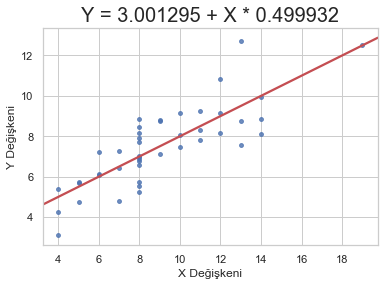

In [23]:
veri=sns.regplot(x="x",y="y",data=df,scatter_kws={"color":"b","s":15},line_kws={"color":"r"},ci=None)
veri.set_title("Y = 3.001295 + X * 0.499932",fontsize=20);
veri.set_xlabel("X Değişkeni",fontsize=12);
veri.set_ylabel("Y Değişkeni",fontsize=12);

##### Tahmin değerler = Tahmin değerleri temsil eden doğrusal çizgi 
##### Gerçek değerler = Nokta değerler

##### İkinci yöntem olan sklearn modülü getirilir

In [24]:
from sklearn.linear_model import LinearRegression

##### Bağımsız değişken ve bağımlı değişkenler yeniden atanır bu sefer sabit kullanılmayacak

In [25]:
X=df[["x"]]
Y=df["y"]

#### Model tanıtılır

In [26]:
model=LinearRegression().fit(X,Y)

#### B0 ve B1 katsayısı çağırılır

In [27]:
print(model.intercept_,model.coef_)

3.0012954545454535 [0.49993182]


In [28]:
model.coef_

array([0.49993182])

##### Bağımsız değişkenin yani  x'in tahmin y değerleri gösterilir

In [29]:
model.predict(X)[:5]

array([8.00061364, 7.00075   , 9.50040909, 7.50068182, 8.50054545])

##### Tahmin değer yapılır . Örneğin X=20 ise Y tahmin olarak kaçtır ? (Amaç bağımsız değişkene değer verdiğimizde bağımlı değişkeni bulmaktır)

In [30]:
model.predict([[20]])

array([12.99993182])

#### Birden fazla x değeri de girilebilir. Örneğin X=20,X=30 ve X=48 değerleri için Y'nin tahmin olarak değerleri kaçtır ?

In [31]:
model.predict([[20],[30],[48]])

array([12.99993182, 17.99925   , 26.99802273])

#### Gerçek ve tahmin y değerlerini bir arada görmek için iki veri tabloya eklenir

In [32]:
hesap=pd.DataFrame({"gercek_y":Y,"tahmin_y":model.predict(X)})

In [33]:
hesap[:10]

,gercek_y,tahmin_y
0,8.04,8.000614
1,6.95,7.000750
2,7.58,9.500409
3,8.81,7.500682
4,8.33,8.500545
5,9.96,10.000341
6,7.24,6.000886
7,4.26,5.001023
8,10.84,9.000477
9,4.82,6.500818


#### Fark hesaplanır

In [34]:
hesap["fark"]=hesap["gercek_y"]-hesap["tahmin_y"]

In [35]:
hesap[:10]

,gercek_y,tahmin_y,fark
0,8.04,8.000614,0.039386
1,6.95,7.000750,-0.050750
2,7.58,9.500409,-1.920409
3,8.81,7.500682,1.309318
4,8.33,8.500545,-0.170545
5,9.96,10.000341,-0.040341
6,7.24,6.000886,1.239114
7,4.26,5.001023,-0.741023
8,10.84,9.000477,1.839523
9,4.82,6.500818,-1.680818


#### Farklar çizgi grafikle gösterilir

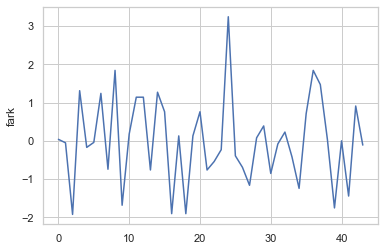

In [36]:
sns.lineplot(x=hesap.index,y=hesap["fark"])

#### Şekildede görüldüğü gibi farklar '-' ve '+' yani yön bulundurduğundan  '- ' lerden kurtulmak için farkların karesi alınır

In [37]:
hesap["fark_kare"]=hesap["fark"]**2

In [38]:
hesap[:10]

,gercek_y,tahmin_y,fark,fark_kare
0,8.04,8.000614,0.039386,0.001551
1,6.95,7.000750,-0.050750,0.002576
2,7.58,9.500409,-1.920409,3.687971
3,8.81,7.500682,1.309318,1.714314
4,8.33,8.500545,-0.170545,0.029086
5,9.96,10.000341,-0.040341,0.001627
6,7.24,6.000886,1.239114,1.535403
7,4.26,5.001023,-0.741023,0.549115
8,10.84,9.000477,1.839523,3.383844
9,4.82,6.500818,-1.680818,2.825150


#### MSE değeri hesaplanır

In [39]:
mse = np.mean(hesap["fark_kare"])
mse

1.250856306818182

#### RMSE değeri hesaplanır

In [40]:
rmse=np.sqrt(mse)
rmse

1.1184168752384693